In [24]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import warnings 

from statsmodels.graphics.tsaplots import plot_acf

warnings.filterwarnings("ignore")

In [93]:
#cargar dataser 
df = pd.read_csv("../../datasets/TSLA.csv")
df = df.iloc[-365*2:]
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2226,2019-05-03,48.771999,51.321999,48.698002,51.006001,51.006001,118534000
2227,2019-05-06,50.004002,51.669998,49.700001,51.068001,51.068001,54169500
2228,2019-05-07,51.360001,51.442001,49.020000,49.411999,49.411999,50657000
2229,2019-05-08,49.388000,50.119999,48.840000,48.967999,48.967999,30882000
2230,2019-05-09,48.400002,48.736000,47.388000,48.396000,48.396000,33557000


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 2226 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       730 non-null    object 
 1   Open       730 non-null    float64
 2   High       730 non-null    float64
 3   Low        730 non-null    float64
 4   Close      730 non-null    float64
 5   Adj Close  730 non-null    float64
 6   Volume     730 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 40.1+ KB


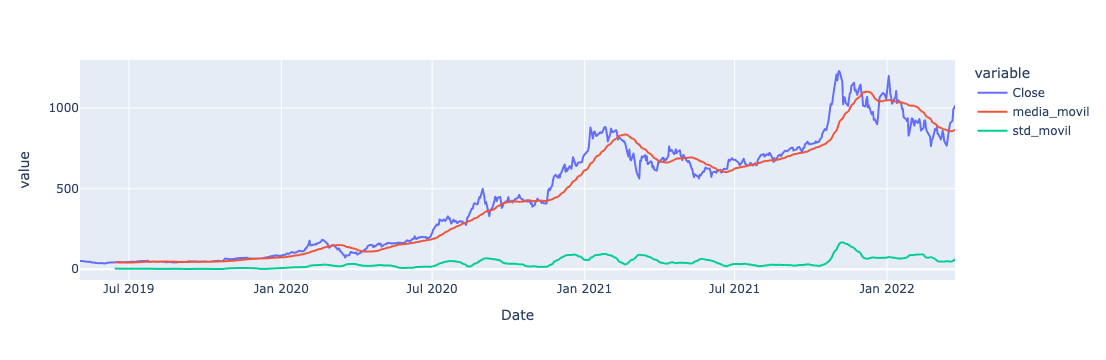

In [95]:
##agregar medial movil 

df['media_movil'] = df.Close.rolling(30).mean()
df['std_movil'] = df.Close.rolling(30).std()

fig = px.line(df,x='Date',y=['Close','media_movil','std_movil'])
fig.show()

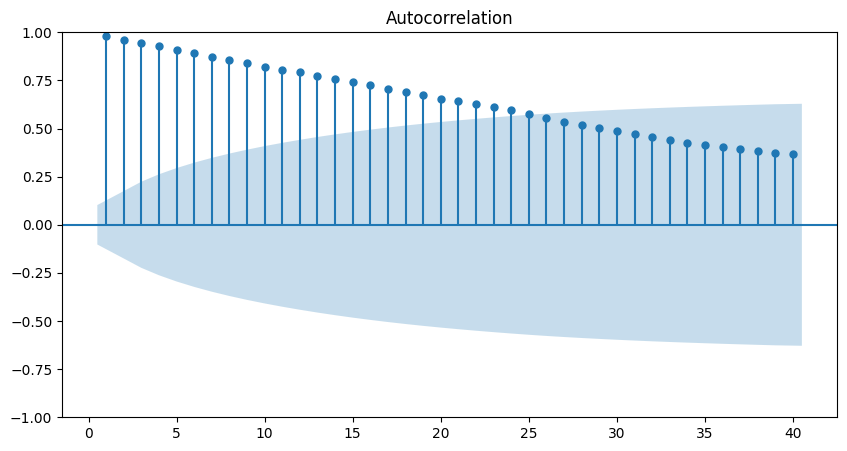

In [96]:
#grafico de autocorrelacion 
fig,(ax1) = plt.subplots(1,1,figsize=(10,5))
fig = plot_acf(df.iloc[-366:]['Close'],lags=40,alpha=0.05,ax=ax1,zero=False)
plt.show()

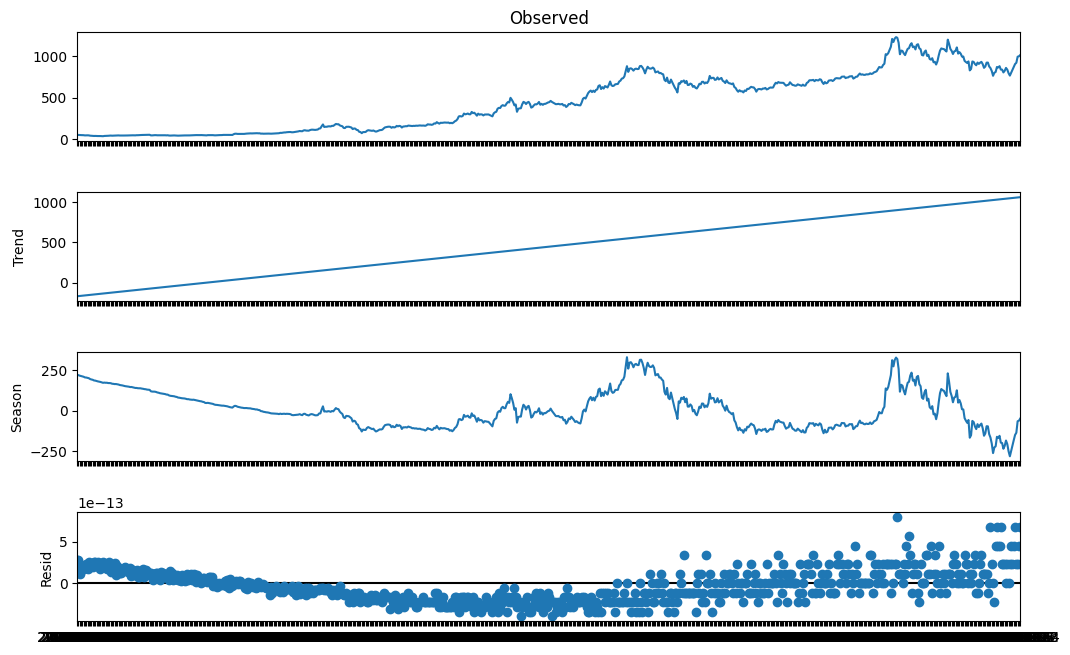

In [102]:
#analizar tendencia del ultimo ano 
from statsmodels.tsa.seasonal import STL

new_df = df[['Date','Close']]
new_df = new_df.set_index('Date')
stl_close = STL(new_df,period=365).fit()

fig = stl_close.plot()
fig.set_size_inches((12,7))
plt.show()

In [98]:
np.mean(stl_close.resid).round(3)

np.float64(-0.0)

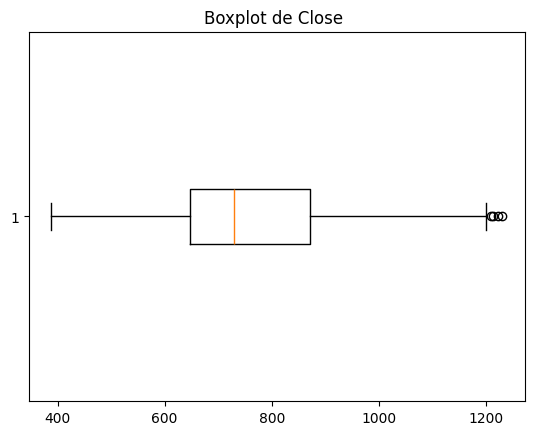

In [99]:
#revision de valores atipicos ultimo 365 dias 
plt.boxplot(new_df,vert=False)
plt.title("Boxplot de Close ")
plt.show()

Text(0.5, 1.0, 'Grafico de correlacion')

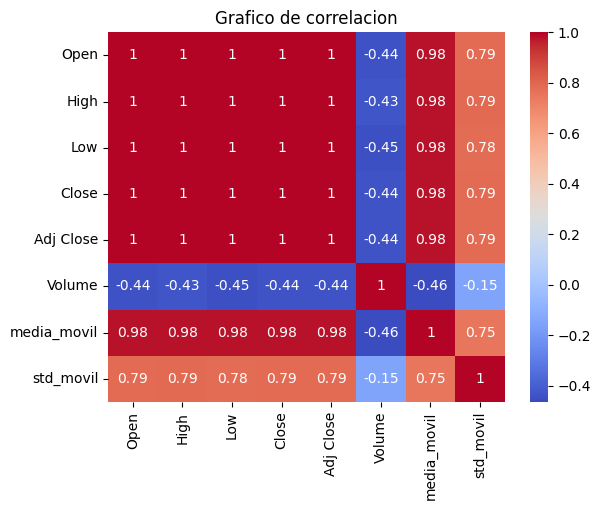

In [100]:
#grafico de correlacion 
sns.heatmap(df.select_dtypes(include=['int64','float64']).corr(),annot=True,cmap='coolwarm')
plt.title('Grafico de correlacion')

-0.4402488484567612


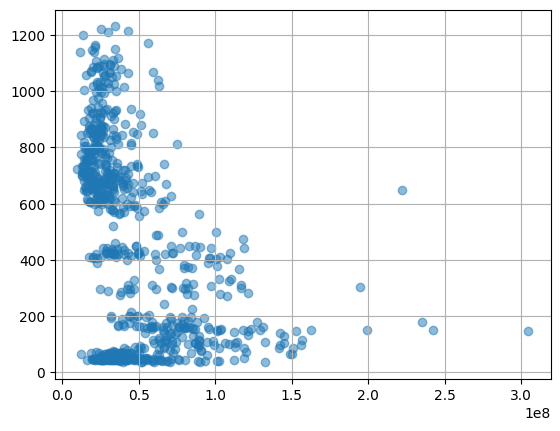

In [101]:
# Analisis LAG

lag = 1 
df['Volume_lag'] = df['Volume'].shift(lag)
#correlacion entrece el volume lag y close ultimo anio
correlation = df[['Volume_lag','Close']].corr().iloc[0,1]
print(correlation)
#graficar 
plt.scatter(df['Volume_lag'],df['Close'],alpha=0.5)
plt.grid()
plt.show()

In [92]:
new_df.describe().round(1)

,Open,High,Low,Close,Adj Close,Volume,media_movil,std_movil,Volume_lag
count,365.0,365.0,365.0,365.0,365.0,365.0,365.0,365.0,365.0
mean,762.6,779.6,744.4,762.9,762.9,29892931.2,744.9,56.4,29936463.3
std,184.7,190.2,178.6,184.5,184.5,16286504.4,183.3,32.0,16289001.7
min,394.0,407.0,379.1,388.0,388.0,9800600.0,418.2,14.9,9800600.0
25%,647.0,658.8,627.2,647.0,647.0,20521100.0,643.7,29.0,20521100.0
50%,719.8,740.8,711.4,730.2,730.2,26378000.0,707.8,51.2,26542400.0
75%,870.3,886.9,851.5,870.4,870.4,34463700.0,864.8,75.1,34472000.0
max,1234.4,1243.5,1217.0,1229.9,1229.9,222126200.0,1102.9,167.2,222126200.0
